# Question 2) AdaLine & MadaLine

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from sklearn.utils import shuffle
import torch
import pandas as pd
from sklearn.metrics import classification_report

C:\Users\Niloufar Faridani\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [80]:
data_1_x = np.random.normal (1, 0.3, 100)
data_1_y = np.random.normal (1, 0.3, 100)
data_2_x = np.random.normal (-1, 0.3, 100)
data_2_y = np.random.normal (-1, 0.3, 100)

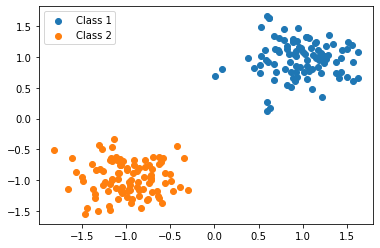

In [81]:
plt.scatter(x=data_1_x, y=data_1_y, label="Class 1")
plt.scatter(x=data_2_x, y=data_2_y, label="Class 2")
plt.legend()

In [5]:
from tqdm.auto import tqdm


class Adaline():
    def __init__(self, num_features=2, lr=0.2, stopCondition=1e-10):
       
        self.weights = np.random.random(num_features)
        self.bias = np.random.random()
        self.lr = lr
        self.stopCondition = stopCondition
        self.Totalloss = []
    
    def forward(self, xi):
        
        net = self.bias + np.dot(xi, self.weights)
        return net
    
    def updateValues(self, xi, net, target):
        
        self.bias += self.lr * (target - net)
        self.weights += self.lr * (target - net) * xi
        return max(abs(self.lr * (target - net)), max(abs(self.lr * (target - net) * xi)))

    def loss(self, targets, nets):
        return np.mean(0.5 * (np.array(targets) - np.array(nets))**2)

    def train(self, X, Y):
        
        self.Totalloss = []
        max_change = 1e9
        X, Y = shuffle(X, Y, random_state=0)
        for epoch in tqdm(range(10)):
            t, nets = [], []
            for x, y in zip(X, Y):
                net = self.forward(x)
                step_max_change = self.updateValues(x, net, y)
                max_change = min(max_change, step_max_change)
                t.append(y)
                nets.append(net)
            self.Totalloss.append(self.loss(t, nets))
            if max_change < self.stopCondition:
                print(max_change, self.stopCondition)
                break

    def activationFunction(self, f):
        return 1 if f >= 0 else -1

    def predict(self, X):
        Y = []
        for x in X:
            net = self.forward(x)
            Y.append(self.activationFunction(net))
        return np.array(Y)

    def plot_loss(self):
        plt.plot(self.Totalloss, label="0.5 * (target - net)**2")
        plt.legend()
        plt.title("Adaline Loss")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.show()
    
    def plot_scatter(self, X, Y):
        plt.scatter(X[:, 0], X[:, 1], c=Y, cmap = 'Set1', edgecolors="k", alpha=0.95,)
        xTemp, yTemp = np.meshgrid(np.arange(min(X[:, 0]) - 2, max(X[:, 0]), 0.01) + 1,  np.arange(min(X[:, 1]) - 1, max(X[:, 1]), 0.01) + 1)

        Z = self.predict(np.c_[xTemp.ravel(), yTemp.ravel()])
        Z = Z.reshape(xTemp.shape)
        cm = plt.cm.tab20b
        plt.contourf(xTemp, yTemp, Z, cmap='tab20c', alpha=0.5)
        plt.title("Adaline Decision Boundry")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.show()

  0%|          | 0/10 [00:00<?, ?it/s]

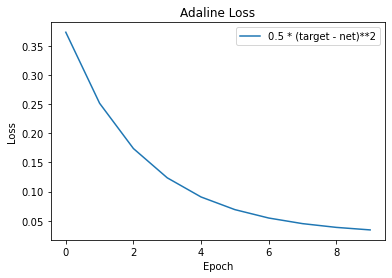

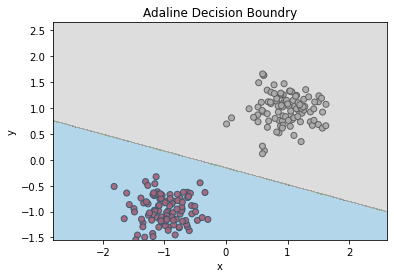

In [98]:
Data_X = np.concatenate([np.stack([data_1_x, data_1_y], axis=-1),
                          np.stack([data_2_x, data_2_y], axis=-1)])
Data_Y = np.concatenate([np.ones(data_1_x.shape), np.ones(data_2_x.shape)*-1])

adaline = Adaline(num_features=2, lr=1e-3)
adaline.train(Data_X, Data_Y)
adaline.plot_loss()
adaline.plot_scatter(Data_X, Data_Y)

C)

In [2]:
data_1_x = np.random.normal (0, 0.6, 100)
data_1_y = np.random.normal (0, 0.6, 100)
data_2_x = np.random.normal (2, 0.8, 20)
data_2_y = np.random.normal (2, 0.8, 20)

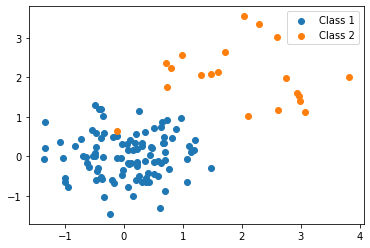

In [3]:
plt.scatter(x=data_1_x, y=data_1_y, label="Class 1")
plt.scatter(x=data_2_x, y=data_2_y, label="Class 2")
plt.legend()

  0%|          | 0/10 [00:00<?, ?it/s]

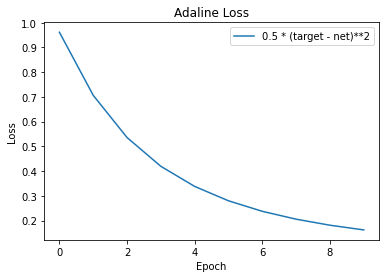

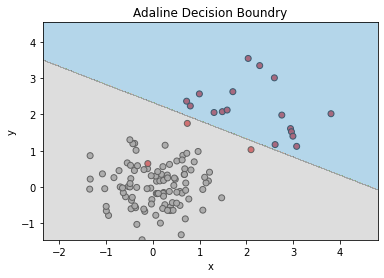

In [6]:
Data_X = np.concatenate([np.stack([data_1_x, data_1_y], axis=-1),
                          np.stack([data_2_x, data_2_y], axis=-1)])
Data_Y = np.concatenate([np.ones(data_1_x.shape), np.ones(data_2_x.shape)*-1])

adaline = Adaline(num_features=2, lr=1e-3)
adaline.train(Data_X, Data_Y)
adaline.plot_loss()
adaline.plot_scatter(Data_X, Data_Y)

### MadaLine

In [39]:
df = pd.read_csv('F:/Term 7/Neural Networks/Attachments/Q2_Dataset/MadaLine.csv', header=None)
df[2] = df[2].replace(0, -1)
df

,0,1,2
0,-0.642823,0.720606,-1.0
1,-0.218126,0.677263,-1.0
2,-0.582930,-0.347496,-1.0
3,0.285127,0.091750,-1.0
4,-0.335577,-0.313893,-1.0
...,...,...,...
195,0.744066,-1.206548,1.0
196,-0.457547,1.286227,1.0
197,-1.020000,-0.783926,1.0
198,1.363429,-0.800250,1.0


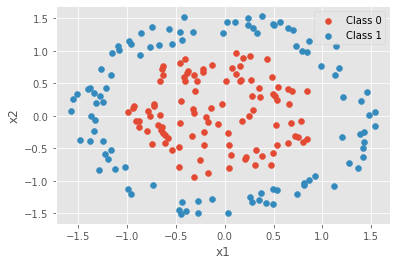

In [34]:
with plt.style.context("ggplot"):
    plt.scatter(x=df.loc[df[df.columns[2]] == 0][df.columns[0]], 
                y=df.loc[df[df.columns[2]] == 0][df.columns[1]], label="Class 0")
    plt.scatter(x=df.loc[df[df.columns[2]] == 1][df.columns[0]], 
                y=df.loc[df[df.columns[2]] == 1][df.columns[1]], label="Class 1")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend()

### Norouns: 3 ###


  0%|          | 0/100 [00:00<?, ?it/s]

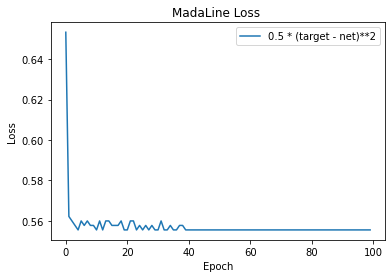

              precision    recall  f1-score   support

        -1.0       0.91      0.87      0.89       100
         1.0       0.88      0.91      0.89       100

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0.89       200



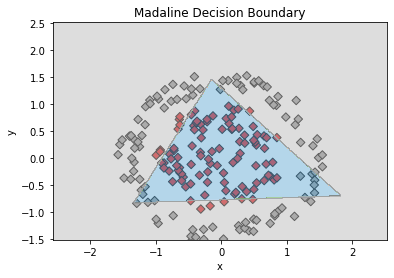

### Norouns: 4 ###


  0%|          | 0/100 [00:00<?, ?it/s]

Training Stopped!


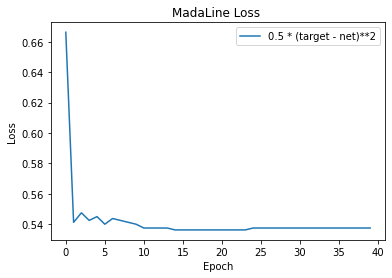

              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00       100
         1.0       1.00      1.00      1.00       100

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



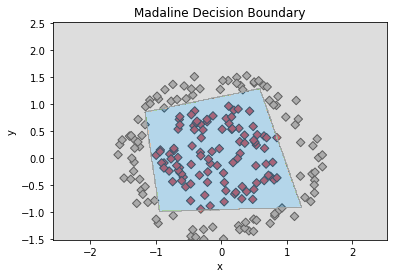

### Norouns: 8 ###


  0%|          | 0/100 [00:00<?, ?it/s]

Training Stopped!


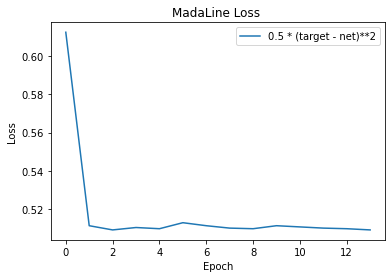

              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00       100
         1.0       1.00      1.00      1.00       100

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



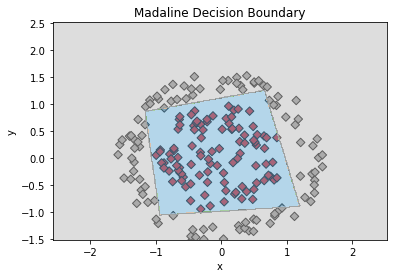

In [100]:
class Madaline:
    def __init__(self, inputs = 2, Norouns = 3, lr = 0.2, stopingCondition = 1e-10):

        self.weights = np.random.random([inputs, Norouns])
        self.output_weights = np.array([1/Norouns] * Norouns)
        self.bias = np.random.random(Norouns)
        self.output_bias = (Norouns - 1)/Norouns
        self.lr = lr
        self.stopingCondition = stopingCondition
        self.loss = []

        self.Norouns = Norouns
        self.inputs = inputs
    
    def activationFunction(self, f):
        return ((f >= 0) - 0.5) * 2  

    def forward(self, x):
        
        ReshapeLength = len(x)
        x = x.reshape(1, ReshapeLength) 
        z_in = self.bias + np.dot(x, self.weights) 
        z = self.activationFunction(z_in)
        y_in = self.output_bias + np.dot(z, self.output_weights)
        y = self.activationFunction(y_in)[0]
        
        return y, z_in, y_in

    def predict(self, X):
        Y = []
        for x in X:
            y, z_in, y_in = self.forward(x)
            Y.append(y)
        return np.array(Y)

    def eval(self, X, Y):
        preds = []
        for x, t in zip(X, Y):
            y, z_in, y_in = self.forward(x)
            preds.append(y)
        
        print(classification_report(Y, preds))

    def step(self, y, z_in, t, x):
        z_in = z_in[0]  
        if t != y: 
            if t == 1: 
                close_zero_idx = np.argmin(abs(z_in))
                self.weights[:, close_zero_idx] += self.lr * (1 - z_in[close_zero_idx]) * x
                self.bias[close_zero_idx] += self.lr * (1 - z_in[close_zero_idx])
            elif t == -1:  
                for h in range(self.Norouns):
                    if z_in[h] > 0:
                        self.weights[:, h] += self.lr * (-1 - z_in[h]) * x
                        self.bias[h] += self.lr * (-1 - z_in[h])
            return True
        return False

    def train(self, X, Y, epochs):
        
        self.loss = []
        
        X, Y = shuffle(X, Y, random_state=42)
        for epoch in tqdm(range(epochs)):
            targets, nets, changes = [], [], []
            for x, t in zip(X, Y):
                y, z_in, y_in = self.forward(x)
                changes.append(self.step(y, z_in, t, x))
                targets.append(t)
                nets.append(y_in)
            self.loss.append(self.calc_loss(targets, nets))
            if not any(changes):
                print("Training Stopped!")
                break
            
    def calc_loss(self, targets, nets):
        return np.mean(0.5 * (np.array(targets) - np.array(nets))**2)

    def plot_loss(self):
        plt.plot(self.loss, label="0.5 * (target - net)**2")
        plt.legend()
        plt.title("MadaLine Loss ")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.show()

    def plot_scatter(self, X, Y):
        plt.scatter(X[:, 0], X[:, 1], c=Y, marker = 'D',cmap='Set1', edgecolors="k", alpha=0.99,)
        
        xTemp, yTemp = np.meshgrid(np.arange(min(X[:, 0]) - 2, max(X[:, 0]), 0.01) + 1, np.arange(min(X[:, 1]) - 1, max(X[:, 1]), 0.01) + 1)

        Z = self.predict(np.c_[xTemp.ravel(), yTemp.ravel()])

        Z = Z.reshape(xTemp.shape)
        cm = plt.cm.tab20b
        plt.contourf(xTemp, yTemp, Z, cmap='tab20c', alpha=0.5)
        plt.title("Madaline Decision Boundary")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.show()

for n in [3, 4, 8]:
    print(f"### Norouns: {n} ###")
    madaline = Madaline(inputs=2, Norouns=n, lr=0.2)
    madaline.train(X=np.array(df[[df.columns[0],df.columns[1]]]), Y=np.array(df[df.columns[2]]), epochs=100)
    madaline.plot_loss()
    madaline.eval(X=np.array(df[[df.columns[0],df.columns[1]]]), Y=np.array(df[df.columns[2]]))
    madaline.plot_scatter(X=np.array(df[[df.columns[0],df.columns[1]]]), Y=np.array(df[df.columns[2]]))